In [2]:
%pip install biclustlib --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 22.9 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=72a4fef9b824fc1bd86cab89f52a8832f5ed19b7940370a6fe9808284d461147
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


**1. Importar librerias**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**2. Lectura del archivo de datos**

Carga el DataSet desde un archivo CSV, se muestran las últimas filas del DataFrame para revisar su estructura y se asigna este DataFrame a la variable dfBank para futuras manipulaciones y obtención de estadísticas descriptivas.

El archivo [Bank.csv](https://www.kaggle.com/datasets/kapturovalexander/bank-credit-scoring/data), utilizado en este modelo, relaciona campañas de marketing directo de una institución bancaria. Dichas campañas se basaron en llamadas telefónicas, para saber si el prospecto, suscribiría (sí/no) el producto ofrecido (depósito a plazo bancario).

El objetivo es predecir, mediante un modelo de clasificación, si un cliente suscribirá (sí/no) un depósito a plazo bancario (variable y).

In [3]:
dataFrameBank = pd.read_csv("sample_data/bank.csv", sep=';')

In [6]:
dataFrameBank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [4]:
dfBank = dataFrameBank

In [5]:
dfBank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


**3. Tamaño del conjunto de datos**

Mostramos el total del conjunto de datos presentes en el DataFrame

In [6]:

print(f"Tamaño del conjunto de datos: {dfBank.shape}")

Tamaño del conjunto de datos: (4521, 17)


**4. Verificar duplicados y categorización de los mismos**



*   Verificar la existencia de valores duplicados,
en el conjunto de datos.  Con el objetivo de identificar y manejar posibles datos que puedan sesgar los análisis.
*   Separación de la columnas en categóricas y numéricas, con el objetivo de facilitar el análisis y preprocesamiento posterior, diferenciando entre tipos de datos.


In [7]:

duplicados = dfBank.duplicated().sum()
print(f"Duplicados en el conjunto de datos: {duplicados}")


variables_categoricas = dfBank.select_dtypes(include=['object']).columns.tolist()
variables_numericas = dfBank.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Variables categóricas: {variables_categoricas}")
print(f"Variables numéricas: {variables_numericas}")

Duplicados en el conjunto de datos: 0
Variables categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Variables numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


**5. Valores fuera del rango**

Cuenta cuántos valores en la columna 'age' están fuera del rango de 18 a 65 años. El objetivo de este proceso es detectar y manejar datos que no cumplen con los criterios esperados para el análisis.

In [8]:

out_of_range_age = dfBank[(dfBank['age'] < 18) | (dfBank['age'] > 65)].shape[0]
print(f"Valores fuera de rango en 'age': {out_of_range_age}")

Valores fuera de rango en 'age': 83


**6. Valores faltantes**

Determinar si hay valores faltantes en al menos un atributo categórico o numérico.  Esto con el fin de identificar y manejar valores faltantes para asegurar la integridad del análisis.

In [9]:

valores_faltantes = dfBank.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes[valores_faltantes > 0])

Valores faltantes por columna:
Series([], dtype: int64)


**7. Calculos estadisticos**

Calcular estadísticas de una variable numérica 'age' y otra categórica 'job', la idea es comprender la distribución y características de estas variables clave.

In [10]:

print("Estadísticas de la variable numérica 'age':")
print(dfBank['age'].describe())

print("Distribución de la variable categórica 'job':")
print(dfBank['job'].value_counts())

Estadísticas de la variable numérica 'age':
count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64
Distribución de la variable categórica 'job':
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


**8. Gráficas de distribución de trabajos y edad**

Realizar el diagrama de barras de al la variable categórica 'job'
y el histograma de variable numérica 'age', estos gráficos utilizdos para visualizar la distribución de trabajos y edades en el conjunto de datos, esto con el objeto de visualizar la distribución de estas variables para detectar posibles sesgos o patrones.

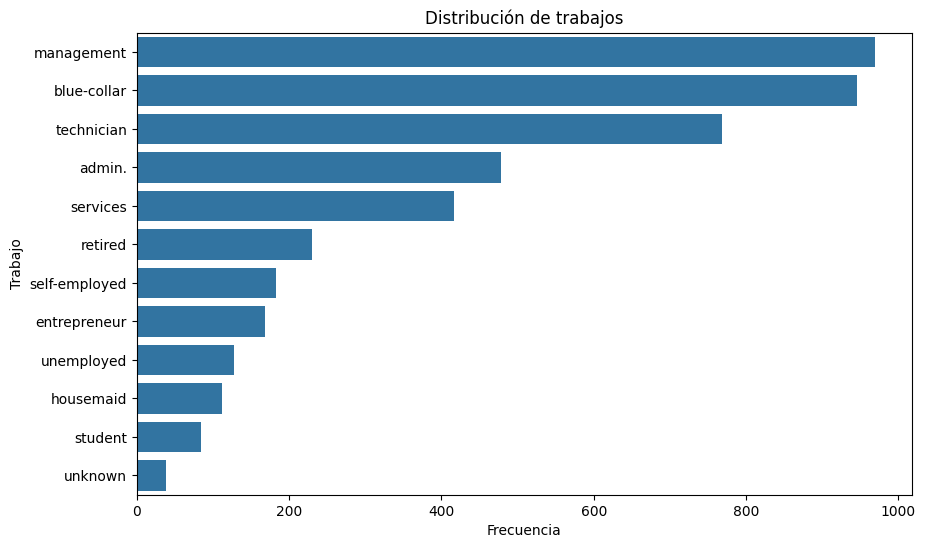

In [11]:

plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=dfBank, order=dfBank['job'].value_counts().index)
plt.title('Distribución de trabajos')
plt.xlabel('Frecuencia')
plt.ylabel('Trabajo')
plt.show()

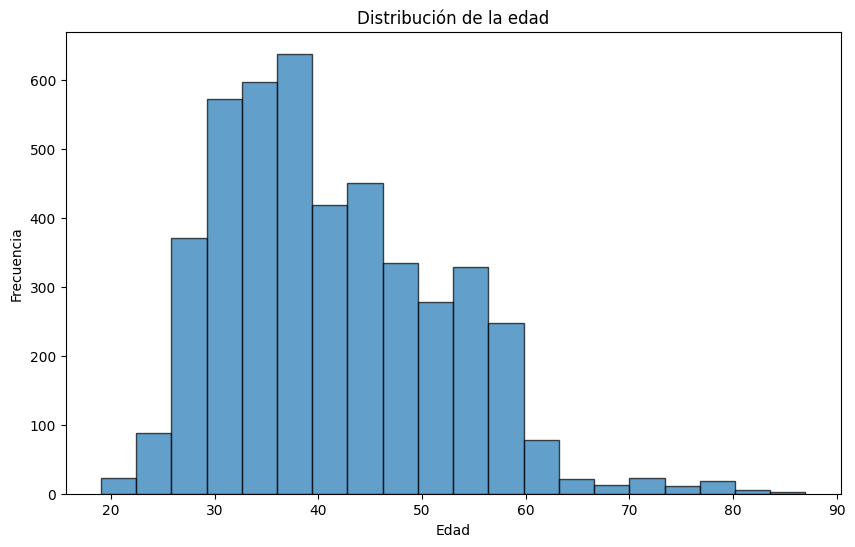

In [12]:

plt.figure(figsize=(10, 6))
plt.hist(dfBank['age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


**9. Distribución de la variable objetivo 'y'**

Identificar la variable target y verificar el balance entre clases, se ecoge la variable 'y' que corresponde a las respuesta de la encuesta de si o no aceptan servicios bancarios.  Con el ideal de entender la proporción de las clases en la variable objetivo para planificación de modelos.

In [13]:

print("Distribución de la variable target 'y':")
print(dfBank['y'].value_counts())

Distribución de la variable target 'y':
y
no     4000
yes     521
Name: count, dtype: int64


**10. Datos de entrenamiento y prueba**

Divide el conjunto de datos en subconjuntos de entrenamiento y prueba, manteniendo la proporción de la variable objetivo, con esto prepararemos los datos para la construcción y evaluación de los modelos.



In [14]:

train_df, test_df = train_test_split(dfBank, test_size=0.3, random_state=42, stratify=dfBank['y'])


print(f"Tamaño del conjunto de entrenamiento: {train_df.shape}")
print(f"Tamaño del conjunto de prueba: {test_df.shape}")

Tamaño del conjunto de entrenamiento: (3164, 17)
Tamaño del conjunto de prueba: (1357, 17)


**11. Limpieza de datos**

Se eliminan las filas con valores faltantes y fuera de rango, y se crea una nueva columna para agrupar edades por rangos, con la intención de asegurar la calidad y consistencia de los datos para el modelo.

In [15]:

train_df = train_df.dropna()  # Eliminamos filas con valores faltantes para simplificar

# Tratar los valores fuera de rango
train_df = train_df[(train_df['age'] >= 18) & (train_df['age'] <= 65)]  # Filtramos edades fuera de rango

# Normalizar y/o discretizar variables
train_df['age_bin'] = pd.cut(train_df['age'], bins=[0, 25, 50, 75, 100], labels=['0-25', '26-50', '51-75', '76-100'])


**12. Analísis de correlación**

Analizamos la correlacion de las variables, Para lograrlos se crea una matriz de correlación entre las variables numéricas, que hagan posible la identificación de relaciones entre las variables que puedan influir en el modelado y el análisis de datos.

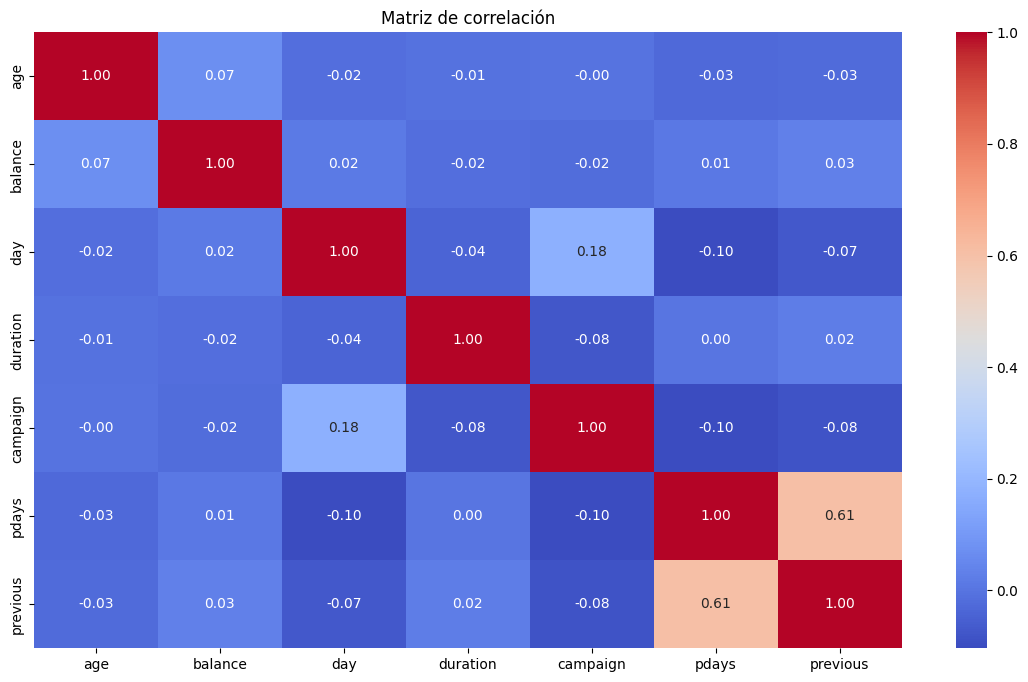

In [16]:

numerical_columns = train_df.select_dtypes(include=['number'])


plt.figure(figsize=(14, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


**13. Guardar y cargar datos procesados**


 En este ultimo segmento de código, se guarda el conjunto de datos procesados en un archivo CSV y luego lo carga de nuevo para su revisión para asegurar la persistencia de los datos procesados y verificar su integridad.

In [17]:

train_df.to_csv('archivo_datos_procesados.csv', index=False)

preprocessed_train_df = pd.read_csv('archivo_datos_procesados.csv')
preprocessed_train_df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_bin
0,37,entrepreneur,single,tertiary,no,1467,yes,yes,cellular,17,nov,349,1,-1,0,unknown,no,26-50
1,25,unemployed,single,secondary,no,34,no,yes,unknown,4,jul,316,1,-1,0,unknown,no,0-25
2,53,retired,married,secondary,no,1278,yes,no,telephone,15,jul,174,3,-1,0,unknown,no,51-75
3,31,housemaid,married,unknown,yes,-6,no,yes,telephone,7,jul,94,2,-1,0,unknown,no,26-50
4,43,unemployed,married,secondary,no,3529,no,no,cellular,5,feb,169,2,-1,0,unknown,no,26-50


In [18]:
preprocessed_train_df.shape

(3118, 18)